# Finding the proper FOF parameters

In [5]:
from numpy import *
import pandas as pd
import pylab as p
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import vaex
import csv
from scipy.stats import norm #for gaussian
import os
from tqdm import tqdm
import subprocess as sub

% matplotlib inline

## Pleiades as reference

In [116]:
''' Position of Pleiades '''

x_plei = -107.0*1e-3 #kpc
y_plei = 25.9*1e-3
z_plei = -48.3*1e-3

In [2]:
# Inspection on the 31 stars in Pleiades area

ds = vaex.open('/net/virgo01/data/users/virgini/rockstar/RC3/data/data_6d_cut.hdf5')
ds.select('(dec > 20) & (dec < 40) & (ra > 50) & (ra < 80)', name='cluster1')
dp = ds.to_copy(selection='cluster1')

In [ ]:
# Velocity distribution

p.figure(figsize=(10,3))
p.subplot(131), dp.plot1d('vx'), p.axvline(median(dp.data.vx), c='red'), p.ylim(0,8)
p.subplot(132), dp.plot1d('vy'), p.axvline(median(dp.data.vy), c='red'), p.ylim(0,8)
p.subplot(133), dp.plot1d('vz'), p.axvline(median(dp.data.vz), c='red'), p.ylim(0,8)
p.show()

p.figure(figsize=(10,3))
p.subplot(131), dp.plot1d('best_distance'), p.axvline(median(dp.data.best_distance), c='red'), p.ylim(0,8)
p.subplot(132), dp.plot1d('HRV'), p.axvline(median(dp.data.HRV), c='red'), p.ylim(0,8)
p.subplot(133), dp.plot1d('Met_K'), p.axvline(median(dp.data.Met_K), c='red'), p.ylim(0,8)
p.show()

In [ ]:
# We want to cut the stars that less likely belong to Pleiades, even though they are located very closely (l and b)
dp2 = dp.to_copy(selection='(HRV>0) & (HRV<20)')

In [ ]:
p.figure(figsize=(14,5))

p.subplot(121)
minb = int(dp.data.HRV.min())
maxb = int(dp.data.HRV.max())
errb = int(round(dp.data.eHRV.mean(), 0))
bins=arange(minb-2*errb, maxb+2*errb, errb)
p.hist(dp.data.HRV, bins=bins, color='red')
p.hist(dp2.data.HRV, bins=bins, color='gray')
p.axvline(median(dp.data.HRV), color='black')
p.xlabel(r'$v_R$', fontsize='x-large'), p.ylabel(r'$N$')

p.subplot(122)
p.scatter(ds.data.p)
p.scatter(dp.data.HRV, dp.data.eHRV, color='red')
p.scatter(dp2.data.HRV, dp2.data.eHRV, color='gray')
p.xlabel(r'$v_R$', fontsize='x-large'), p.ylabel(r'err $v_R$', fontsize='x-large')
p.show()

# caption = 'Radial velocity distribution of 31 stars in Pleiades area. Most stars have radial valocity between 0 to 15 km/s (denoted by blue color), except for 4 stars (denoted by red color). We will exclude these 4 stars in further analysis. Note: later on, when we run rockstar and reconstruct Pleiades, always compare with this plot'
# print(caption)


In [ ]:
tmp_pdf = '/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb-10/Pleiades.pdf'

with PdfPages(tmp_pdf) as pdf:

    fig = p.figure(figsize=(14,7))
    p.suptitle('Velocity distribution of stars in Pleiades area')

    p.subplot(231)
    minb = int(dp.data.HRV.min())
    maxb = int(dp.data.HRV.max())
    errb = int(round(dp.data.eHRV.mean(), 0))
    bins=arange(minb-2*errb, maxb+2*errb, errb)
    p.hist(dp.data.HRV, bins=bins, color='red')
    p.hist(dp2.data.HRV, bins=bins, color='gray')
    p.axvline(median(dp.data.HRV), color='black')
    p.xlabel(r'$v_R$', fontsize='x-large'), p.ylabel(r'$N$')
    
    p.subplot(232)
    minb = int(dp.data.HRV.min())
    maxb = int(dp.data.HRV.max())
    errb = int(round(dp.data.eHRV.mean(), 0))
    bins=arange(minb-2*errb, maxb+2*errb, errb)
    p.hist(dp.data.HRV, bins=bins, color='red')
    p.hist(dp2.data.HRV, bins=bins, color='gray')
    p.axvline(median(dp.data.HRV), color='black')
    p.xlabel(r'$v_R$', fontsize='x-large'), p.ylabel(r'$N$')
    
    p.subplot(231)
    minb = int(dp.data.HRV.min())
    maxb = int(dp.data.HRV.max())
    errb = int(round(dp.data.eHRV.mean(), 0))
    bins=arange(minb-2*errb, maxb+2*errb, errb)
    p.hist(dp.data.HRV, bins=bins, color='red')
    p.hist(dp2.data.HRV, bins=bins, color='gray')
    p.axvline(median(dp.data.HRV), color='black')
    p.xlabel(r'$v_R$', fontsize='x-large'), p.ylabel(r'$N$')

    p.subplot(234)
    minb = int(dp.data.vx.min())
    maxb = int(dp.data.vx.max())
    errb = int(round(dp.data.vx_uncertainty.mean(), 0))
    bins=arange(minb-2*errb, maxb+2*errb, errb)
    p.hist(dp.data.vx, bins=bins, color='red')
    p.hist(dp2.data.vx, bins=bins, color='gray')
    p.axvline(median(dp.data.vx), color='black')
    p.xlabel(r'$v_x$', fontsize='x-large'), p.ylabel(r'$N$')

    p.subplot(235)
    minb = int(dp.data.vy.min())
    maxb = int(dp.data.vy.max())
    errb = int(round(dp.data.vy_uncertainty.mean(), 0))
    bins=arange(minb-2*errb, maxb+2*errb, errb)
    p.hist(dp.data.vy, bins=bins, color='red')
    p.hist(dp2.data.vy, bins=bins, color='gray')
    p.axvline(median(dp.data.vy), color='black')
    p.xlabel(r'$v_y$', fontsize='x-large'), p.ylabel(r'$N$')
    p.ylim(0,10)

    p.subplot(236)
    minb = int(dp.data.vz.min())
    maxb = int(dp.data.vz.max())
    errb = int(round(dp.data.vz_uncertainty.mean(), 0))
    bins=arange(minb-2*errb, maxb+2*errb, errb)
    p.hist(dp.data.vz, bins=bins, color='red')
    p.hist(dp2.data.vz, bins=bins, color='gray')
    p.axvline(median(dp.data.vz), color='black')
    p.xlabel(r'$v_z$', fontsize='x-large'), p.ylabel(r'$N$')
    p.ylim(0,10)

    p.show()
    pdf.savefig(fig)

In [ ]:
# Position and velocity arrow 

p.figure(figsize=(14,6))
p.subplot(121)
dp.scatter('x', 'y', selection=None, c='black')

for i in range(31):
    p.arrow(dp.data.x[i], dp.data.y[i], dp.data.vx[i]*1e-3, dp.data.vy[i]*1e-3, width=0, color='grey')
    if dp.data.HRV[i] < 0:
        p.arrow(dp.data.x[i], dp.data.y[i], dp.data.vx[i]*1e-3, dp.data.vy[i]*1e-3, width=0, color='red')
    if dp.data.HRV[i] > 20:
        p.arrow(dp.data.x[i], dp.data.y[i], dp.data.vx[i]*1e-3, dp.data.vy[i]*1e-3, width=0, color='red')
p.xlim(-0.35,0.00), p.ylim(-0.02,0.1)

p.subplot(122)
dp.scatter('z', 'y', selection='HRV>=0', c='gray')
dp.scatter('z', 'y', selection='HRV<0', c='red')
for i in range(31):
    if dp.data.HRV[i] < 0:
        p.arrow(dp.data.z[i], dp.data.y[i], dp.data.vz[i]*1e-3, dp.data.vy[i]*1e-3, width=0)
p.xlim(-0.17, 0.03), p.ylim(-0.02,0.1)

p.show()

## The Loop

In [ ]:
# ---------------------
# create a single file
# ---------------------

output = '/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb/various-fb-np10-2'
with open(output, 'w') as f:
    writer = csv.writer(f, delimiter=' ', lineterminator='\n')
    writer.writerow(['#FOF_b', 'FOF_f', 'N_subs', 'Sub_ID', 'N_star', 'Dist[pc]', 'D_std[pc]', 'R_min[pc]', 'R_std[pc]', 'V_std[km/s]'])
    f.close()

# -------------------------------
# our input for running rockstar
# -------------------------------

min_seed   = 10
min_output = 10
unb_thres  = 0.70

# --------------------------------
# make a loop for FOF_b and FOF_f 
# --------------------------------

FOF = arange(0.05, 0.91, 0.01)

for FOF_b in tqdm(FOF, desc='Loading(b)...'):
    for FOF_f in FOF:
        
        # ---------------------------------------------------
        # create the configuration file for running rockstar
        # ---------------------------------------------------

        path_rs = '/net/virgo01/data/users/virgini/rockstar/RC3'
        name_rs = 'subs_auto'
        tmp_cfg = os.path.join(path_rs, name_rs + '.cfg')

        fh = open(tmp_cfg, 'w')
        fh.write('FILE_FORMAT = "ASCII" \n')
        fh.write('OUTPUT_FORMAT = "ASCII" \n')
        fh.write('INBASE = "/net/virgo01/data/users/virgini/rockstar/RC3/input" \n')
        fh.write('OUTBASE = "/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb" \n')
        fh.write('FULL_PARTICLE_CHUNKS = 1 \n')
        fh.write('MIN_HALO_PARTICLES = ' + str(min_seed) + '\n')
        fh.write('MIN_HALO_OUTPUT_SIZE = ' + str(min_output) + '\n')
        fh.write('UNBOUND_THRESHOLD = ' + str(unb_thres) + '\n')
        fh.write('FOF_LINKING_LENGTH = ' + str(FOF_b) + '\n')
        fh.write('FOF_FRACTION = ' + str(FOF_f) + '\n')
        fh.close()

        # -------------
        # run Rockstar
        # -------------

        input_rs = os.path.join(path_rs + '/input/input_6d_5')
        popen = sub.Popen(['./rockstar', '-c', tmp_cfg, input_rs],stdout=sub.PIPE,stderr=sub.PIPE, cwd=path_rs)
        output, errors = popen.communicate()

        # -----------------------------------
        # read the output file from rockstar
        # -----------------------------------

        tmp_sub = '/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb/halos_0.0.ascii'
        hdr_sub = ['id', 'num_p', 'mvir', 'mbound_vir', 'rvir', 'vmax', 'rvmax', 'vrms',\
                   'x', 'y', 'z', 'vx', 'vy', 'vz', 'Jx', 'Jy', 'Jz', 'E', 'Spin', \
                   'PosUncertainty', 'VelUncertainty', 'bulk_vx', 'bulk_vy', 'bulk_vz',\
                   'BulkVelUnc', 'n_core', 'm200b', 'm200c', 'm500c', 'm2500c',\
                   'Xoff', 'Voff', 'spin_bullock', 'b_to_a', 'c_to_a', \
                   'A[x]', 'A[y]', 'A[z]', 'b_to_a(500c)', 'c_to_a(500c)', \
                   'A[x](500c)', 'A[y](500c)', 'A[z](500c)', 'Rs', 'Rs_Klypin', 'T/|U|',\
                   'M_pe_Behroozi', 'M_pe_Diemer', 'idx', 'i_so', 'i_ph', 'num_cp', 'mmetric']
        df_sub  = pd.read_csv(tmp_sub, sep=' ', comment='#', names=hdr_sub)

        # ------------------------------------------
        # calculate n, r, and v of all substructure
        # ------------------------------------------

        for i in range(max(df_sub.id)):
            idx = df_sub.id == i
            n = df_sub.num_p[idx]
#             r_mean = sqrt(df_sub.x[idx]**2 + df_sub.y[idx]**2 + df_sub.z[idx]**2) # change mean into median
            r = sqrt(median(df_sub.x[idx]**2 + median(df_sub.y[idx]**2 + df_sub.z[idx]**2)))
            v = sqrt(df_sub.vx[idx]**2 + df_sub.vy[idx]**2 + df_sub.vz[idx]**2)

        # ------------------------------------------------------------------
        # choose one substructure that has the closest position to pleiades
        # ------------------------------------------------------------------

        r_min = 100
        for j in range(max(df_sub.id)):
            ind = df_sub.id == j
            r_sub = math.sqrt((median(df_sub.x[ind])-(x_plei))**2 + (median(df_sub.y[ind])-(y_plei))**2 + \
                              (median(df_sub.z[ind])-(z_plei))**2)
            if r_min > r_sub:
                r_min = r_sub
                id_min = df_sub.id[ind]
            
        # -----------------------------------------------------------
        # calctulate the standard deviation of position and velocity
        # -----------------------------------------------------------
        
        tmp_par = '/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb/halos_0.0.particles'
        hdr_par = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'par_id', 'as_int_id', 'int_id', 'ext_id']
        df_par  = pd.read_csv(tmp_par, sep=' ', comment='#', names=hdr_par)
        
        cond   = (df_par.as_int_id == df_par.int_id) & (df_par.ext_id != -1) & (df_par.ext_id == int(id_min))
        df_par = df_par[cond]
        
        std_r = sqrt(((std(df_par.x))**2 + (std(df_par.y))**2 + (std(df_par.z))**2)/3)
        std_v = sqrt(((std(df_par.vx))**2 + (std(df_par.vy))**2 + (std(df_par.vz))**2)/3)
       
        # ---------------------- #
        # calculate the distance #
        # ---------------------- #

        ds = vaex.from_pandas(df_par)
        ds.add_virtual_columns_cartesian_to_spherical()
        dist  = ds.evaluate('distance').mean()
        d_std = ds.evaluate('distance').std()

        # -----------------------------------------
        # store the information into a single file
        # -----------------------------------------
        
        N_subs  = len(df_sub.id)
        Sub_ID  = int(id_min)
        R_min   = round(r_min*1e3, 5)
        N_star  = int(df_sub.num_p[id_min])
        R_std   = round(std_r*1e3, 5)
        V_std   = round(std_v, 5)
        Dist    = round(dist*1e3, 2)
        D_std   = round(d_std*1e3, 2)
                
        output = '/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb/various-fb-np10-2'
        with open(output, 'a') as f:
            writer = csv.writer(f, delimiter=' ', lineterminator='\n')
            writer.writerow([FOF_b, FOF_f, N_subs, Sub_ID, N_star, Dist, D_std, R_min, R_std, V_std])
            f.close()
        
print('finish')

## The Result

In [6]:
output = '/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb-np10//various-fb-np10'
header = ['FOF_b', 'FOF_f', 'N_subs', 'Sub_ID', 'N_star', 'Dist', 'D_std', 'R_min', 'R_std', 'V_std'] #for np10
# header = ['FOF_b', 'FOF_f', 'N_subs', 'Sub_ID', 'R_min', 'N_star', 'Dist', 'D_std', 'R_std', 'V_std']
df_map = pd.read_csv(output, sep=' ', comment='#', names=header)

## Velocity dispersion

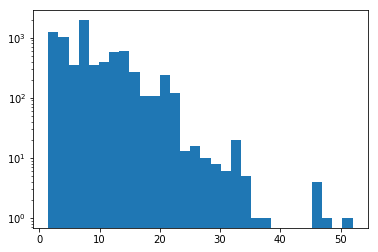

In [7]:
p.hist(df_map.V_std, bins=30)
p.yscale('log')
p.show()

In [8]:
vel = df_map.V_std.as_matrix()
vel = vel.reshape((86,86))
vel2 = vel.copy().astype(float)
# vel2[vel2 > 21] = nan

In [15]:
p.rc('text', usetex=False)

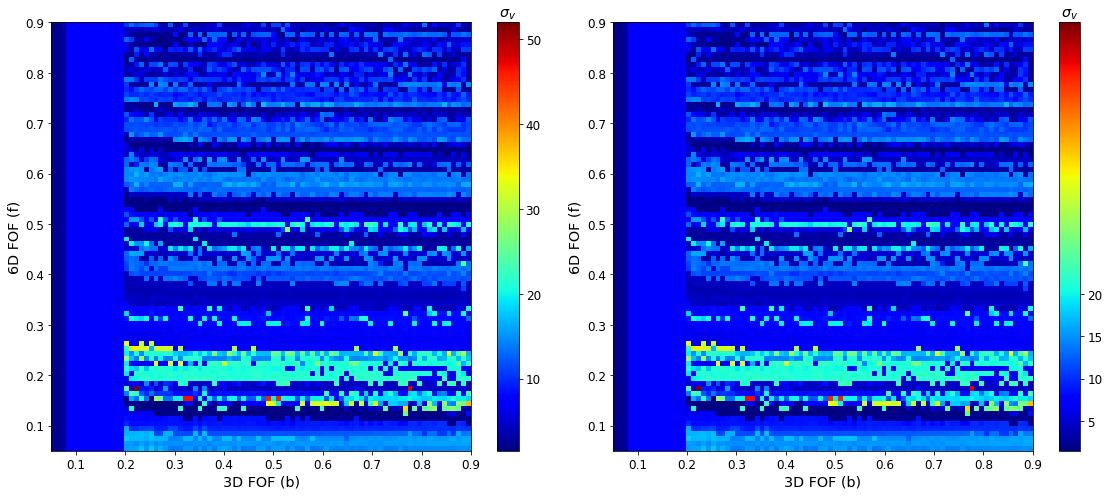

In [9]:
map_vel = os.path.join(output+'-map-vel'+'.png')
# with PdfPages(map_vel) as pdf:

fig = p.figure(figsize=(16,7))
gs = p.GridSpec(ncols=2,nrows=1)
data = [vel, vel2]
tick = [[10, 20, 30, 40, 50], [5, 10, 15, 20]]

for i in range(2):
    fig.add_subplot(gs[i])
    extent=[df_map.FOF_b.min(), df_map.FOF_b.max(), df_map.FOF_f.min(), df_map.FOF_f.max()]
    im = p.imshow(data[i].T, extent=extent, origin='lower', cmap='jet', aspect='auto')
    p.tick_params(labelsize='large')
    p.xlabel('3D FOF (b)', fontsize='x-large')
    p.ylabel('6D FOF (f)', fontsize='x-large')
    cb = p.colorbar(im, ticks=tick[i])
    cb.ax.set_title('$\sigma_v$', fontsize='x-large')
    cb.ax.tick_params(labelsize='large')
    gs.tight_layout(fig, w_pad=3)
p.show()

# pdf.savefig(fig)
# fig.savefig(map_vel, format='png')
p.close()

In [6]:
params = {'text.usetex': False}
p.rcParams.update(params)

## Distance of substructure from the real Pleaides (shift of main position)

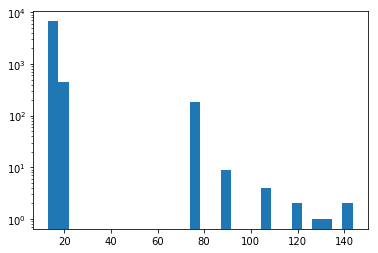

In [10]:
p.hist(df_map.R_min, bins=30)
p.yscale('log')
p.show()

In [11]:
pos = df_map.R_min.as_matrix()
pos = pos.reshape((86,86))

pos2 = pos.copy().astype(float)
# pos2[pos2>25] = nan

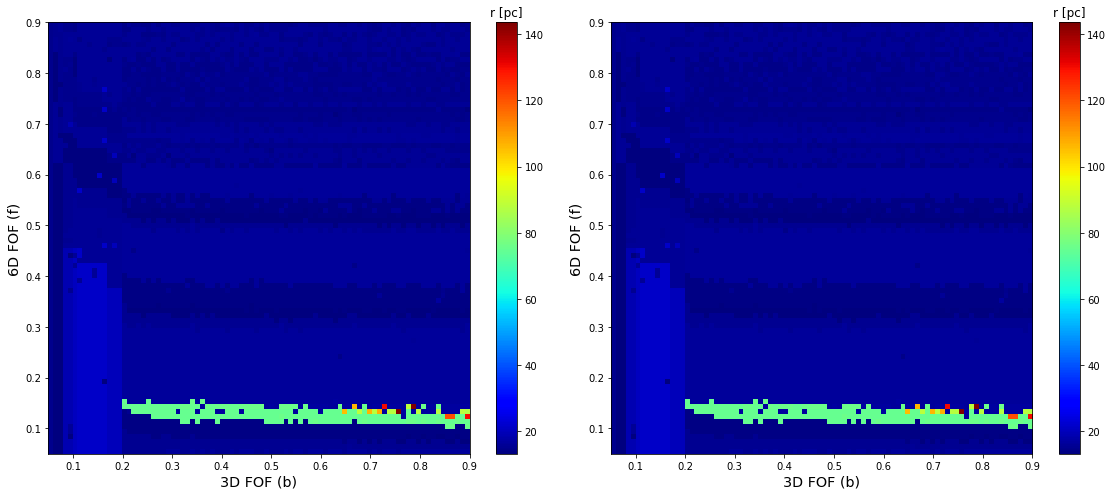

In [12]:
map_pos = os.path.join(output+'-map-pos'+'.pdf')
# with PdfPages(map_vel) as pdf:

fig = p.figure(figsize=(16,7))
gs = p.GridSpec(ncols=2, nrows=1)

p.subplot(gs[0])
extent=[df_map.FOF_b.min(), df_map.FOF_b.max(), df_map.FOF_f.min(), df_map.FOF_f.max()]
im = p.imshow(pos.T, extent=extent, origin='lower', cmap='jet', aspect='auto')
cb = p.colorbar(im)
cb.ax.set_title('r [pc]')
p.xlabel('3D FOF (b)', fontsize='x-large')
p.ylabel('6D FOF (f)', fontsize='x-large')

p.subplot(gs[1])
im = p.imshow(pos2.T, extent=extent, origin='lower', cmap='jet', aspect='auto')
cb = p.colorbar(im)
cb.ax.set_title('r [pc]')
p.xlabel('3D FOF (b)', fontsize='x-large')
p.ylabel('6D FOF (f)', fontsize='x-large')

gs.tight_layout(fig)
p.show()

#     pdf.savefig(fig)
# fig.savefig(map_pos, format='png')
p.close()

## Number of stars

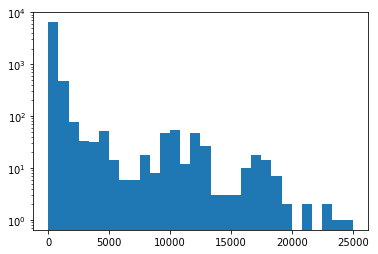

In [172]:
p.hist(df_map.N_star, bins=30)
p.yscale('log')
p.show()

In [38]:
num = df_map.N_star.as_matrix()
num = num.reshape((86,86))

num2 = num.copy().astype(float)
num2[num2>31] = nan

In [ ]:
# map_vel = os.path.join(output+'-map-nstar'+'.pdf')
# with PdfPages(map_vel) as pdf:

fig = p.figure(figsize=(17,7))
gs = p.GridSpec(ncols=2, nrows=1)

p.subplot(gs[0])
extent=[df_map.FOF_b.min(), df_map.FOF_b.max(), df_map.FOF_f.min(), df_map.FOF_f.max()]
im = p.imshow(log10(num.T), extent=extent, origin='lower', cmap='jet', aspect='auto')
cb = p.colorbar(im)
cb.ax.set_title('Log N')
cb.ax.tick_params(labelsize='large')
p.xticks(fontsize='large'), p.yticks(fontsize='large')
p.xlabel('3D FOF (b)', fontsize='x-large'), p.ylabel('6D FOF (f)', fontsize='x-large')

p.subplot(gs[1])
im = p.imshow(num2.T, extent=extent, origin='lower', cmap='jet', aspect='auto')
cb = p.colorbar(im)
cb.ax.set_title('N$_*$')
cb.ax.tick_params(labelsize='large')
p.xticks(fontsize='large'), p.yticks(fontsize='large')
p.xlabel('3D FOF (b)', fontsize='large'), p.ylabel('6D FOF (f)', fontsize='large')

gs.tight_layout(fig)
p.show()

# pdf.savefig(fig)
# p.close()

## Number of Substructure

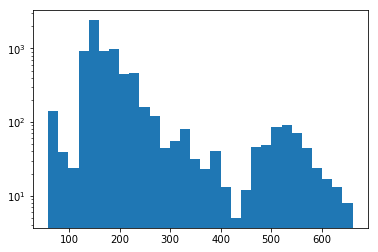

In [16]:
p.hist(df_map['N_subs'], bins=30)
p.yscale('log')
p.show()

In [40]:
nsubs = df_map['N_subs'].as_matrix()
nsubs = nsubs.reshape((86,86))

In [41]:
nsubs2 = nsubs.copy().astype(float)
nsubs2[nsubs2>=100] = nan

In [ ]:
fig = p.figure(figsize=(17,7))
gs = p.GridSpec(ncols=2, nrows=1)

p.subplot(gs[0])
extent=[df_map.FOF_b.min(), df_map.FOF_b.max(), df_map.FOF_f.min(), df_map.FOF_f.max()]
im = p.imshow(nsubs.T, extent=extent, origin='lower', cmap='jet', aspect='auto')
cb = p.colorbar(im)
cb.ax.set_title('N subs')
cb.ax.tick_params(labelsize='large')
p.xticks(fontsize='large'), p.yticks(fontsize='large')
p.xlabel('3D FOF (b)', fontsize='x-large'), p.ylabel('6D FOF (f)', fontsize='x-large')

p.subplot(gs[1])
im = p.imshow(nsubs2.T, extent=extent, origin='lower', cmap='jet', aspect='auto')
cb = p.colorbar(im)
cb.ax.set_title('N subs')
cb.ax.tick_params(labelsize='large')
p.xticks(fontsize='large'), p.yticks(fontsize='large')
p.xlabel('3D FOF (b)', fontsize='large'), p.ylabel('6D FOF (f)', fontsize='large')

gs.tight_layout(fig)
p.show()

## Selection for all criteria (velocity dispersion, distance, number of stars, and position

In [19]:
cond_v = (df_map.V_std <= 10)
cond_d = (df_map.Dist >= 110) & (df_map.Dist <= 150)
cond_n = (df_map.N_star<= 31) #& (df_map['N_star'] >= 10)
cond_r = (df_map.R_min <= 20)

In [ ]:
cond = cond_v & cond_d & cond_r & cond_n

## Try to find intersection between everything and make the colormap

In [18]:
df_map.Dist.max()

661.15999999999997

In [32]:
df_map3 = df_map.copy()

In [33]:
df_map3[df_map3.V_std >= 20] = nan
df_map3[df_map3.Dist <= 100] = nan
df_map3[df_map3.Dist >= 150] = nan
df_map3[df_map3.N_star >= 31] = nan
df_map3[df_map3.R_min >= 20] = nan

In [34]:
num3 = df_map3.N_star.as_matrix().reshape((86,86))
vel3 = df_map3.V_std.as_matrix().reshape((86,86))
dis3 = df_map3.Dist.as_matrix().reshape((86,86))
pos3 = df_map3.R_min.as_matrix().reshape((86,86))

In [ ]:
tmp_pdf = '/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb-np10/selected-FOF.pdf'
with PdfPages(tmp_pdf) as pdf:

    fig = p.figure(figsize=(17,15))
    gs = p.GridSpec(ncols=2, nrows=2)

    fig.suptitle('Selection criteria for 3D FOF (b) and 6D FOF (f)', fontsize='xx-large')

    imdata  = [num3, vel3, dis3, pos3]
    imtitle = ['Number of stars', 'Velocity dispersion', 'Median distance', 'Shift of median position']
    cbtitle  = ['N$_*$','$\sigma_v$', 'd [pc]', 'r [pc]']

    for i in range(4):
        fig.add_subplot(gs[i])
        extent=[df_map.FOF_b.min(), df_map.FOF_b.max(), df_map.FOF_f.min(), df_map.FOF_f.max()]
        p.title(imtitle[i], fontsize='x-large')
        im = p.imshow(imdata[i].T, extent=extent, origin='lower', cmap='jet', aspect='auto')
        cb = p.colorbar(im)
        cb.ax.set_title(cbtitle[i])
        cb.ax.tick_params(labelsize='large')
        p.xticks(fontsize='large'), p.yticks(fontsize='large')
        p.xlabel('3D FOF (b)', fontsize='large'), p.ylabel('6D FOF (f)', fontsize='large')

    gs.tight_layout(fig, w_pad=2.0, h_pad=3.0)
    gs.update(top=0.92)

    p.show()
    p.close()
    pdf.savefig(fig)

## For thesis

In [304]:
output = '/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb-np10/various-fb-np10'
header = ['FOF_b', 'FOF_f', 'N_subs', 'Sub_ID', 'N_star', 'Dist', 'D_std', 'R_min', 'R_std', 'V_std']
df_map = pd.read_csv(output, sep=' ', comment='#', names=header)

In [55]:
df_map.V_std.min(), df_map.V_std.max()

(1.4888700000000001, 52.006219999999999)

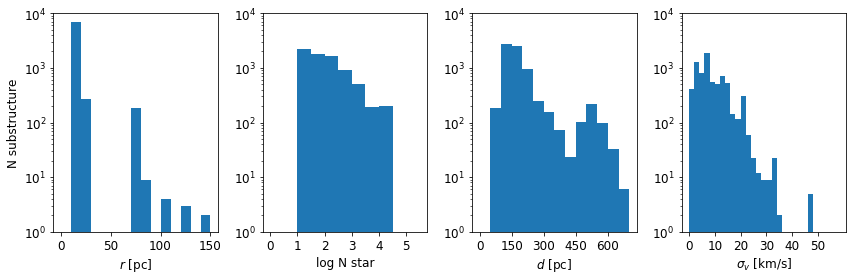

In [53]:
hist = [df_map.R_min, log10(df_map.N_star), df_map.Dist, df_map.V_std]
bins = [arange(0,150+10,10), arange(0,6,0.5), arange(0, 660+50, 50), arange(0, 50+10, 5)]
name = [r'$r$ [pc]', 'log N star', r'$d$ [pc]', r'$\sigma_v$ [km/s]']

fig = p.figure(figsize=(12,4))
gs  = p.GridSpec(nrows=1, ncols=4)

p.subplot(gs[0]), p.ylabel('N substructure', size='large')
p.subplot(gs[1]), p.xticks([0, 1, 2, 3, 4, 5])
p.subplot(gs[2]), p.xticks([0, 150, 300, 450, 600])
p.subplot(gs[3]), p.xticks([0, 10, 20, 30, 40, 50])

for i in range(4):
    fig.add_subplot(gs[i])
    p.hist(hist[i], bins=bins[i])
    p.xlabel(name[i], size='large')
    p.yscale('log')
    p.ylim(1, 10000)
    p.yticks([1, 10, 100, 1000, 10000], ['$10^0$', '$10^1$','$10^2$','$10^3$','$10^4$'])
    p.tick_params(labelsize='large')
gs.tight_layout(fig)
p.show()

tmp = '/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb-np10/hist-plei.png'
fig.savefig(tmp, format='png')

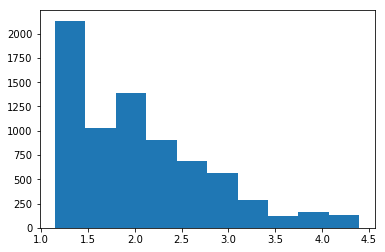

In [31]:
p.hist(log10(df_map.N_star))
p.show()

In [300]:
# Calculate th percentage of our cut....
len(df_map.R_min[df_map.R_min<30])/len(df_map)*100    # ~97%
len(df_map.N_star[df_map.N_star<31]),len(df_map)*100  # ~30%

(2183, 739600)

In [302]:
max(df_map.N_star)

24952

In [66]:
len(df_map.N_star[df_map.N_star<500])/len(df_map)

0.8170632774472688

In [148]:
pos = df_map.R_min.as_matrix()
pos = pos.reshape((86,86))
pos2 = pos.copy().astype(float)
# pos2[pos2>25] = nan

num = df_map.N_star.as_matrix()
num = num.reshape((86,86))
num2 = num.copy().astype(float)
# num2[num2>500] = nan

vel = df_map.V_std.as_matrix()
vel = vel.reshape((86,86))
vel2 = vel.copy().astype(float)
# vel2[vel2 > 21] = nan

dis = df_map.Dist.as_matrix()
dis = dis.reshape((86,86))
dis2 = dis.copy().astype(float)
# dis2[(dis2 > 300)] = nan
# dis2[(dis2 < 115)] = nan

# df_map4 = df_map.copy()
# df_map4[df_map4.Dist < 99] = nan
# df_map4[df_map4.Dist > 151] = nan
# dis3 = df_map4.Dist.as_matrix().reshape((86,86))

In [138]:
len(df_map.V_std[df_map.V_std < 20])/len(df_map)

0.9391563007030828

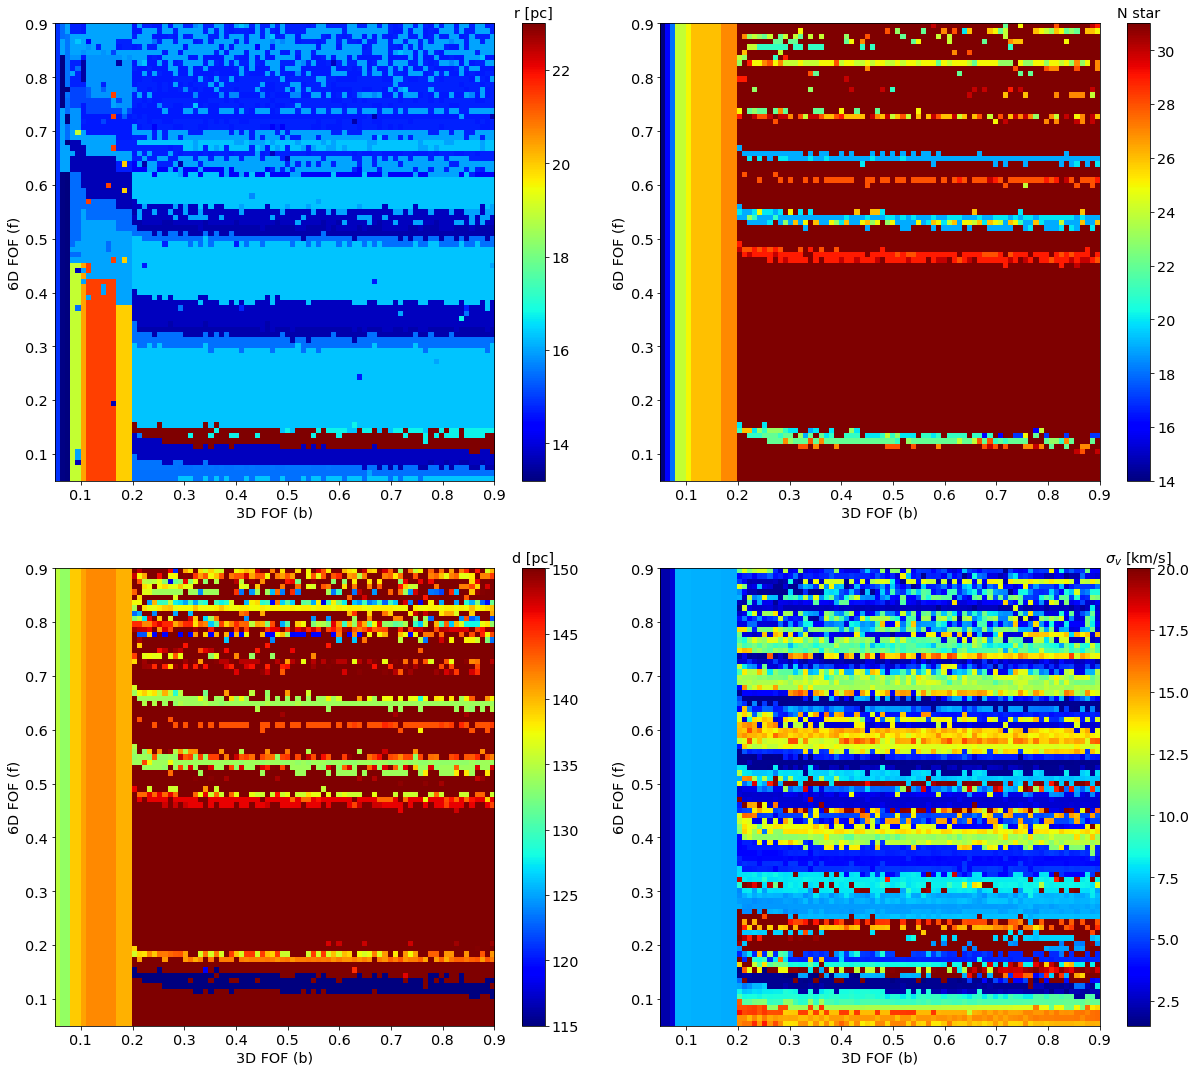

In [149]:
tmp = '/net/virgo01/data/users/virgini/rockstar/RC3/output/vary-fb-np10/cm-plei3.png'

fig = p.figure(figsize=(17,15))
gs = p.GridSpec(ncols=2, nrows=2)
imdata  = [pos2, num2, dis2, vel2]
cbtitle = ['r [pc]', 'N star', 'd [pc]', '$\sigma_v$ [km/s]']
# imticks = [[14, 16, 18, 20, 22], [15, 20, 25, 30], [120, 130, 140, 150], [5, 10, 15, 20]]
vmin=[df_map.R_min.min(), 14, 115, df_map.V_std.min()]
vmax=[23, 31, 150, 20]

for i in range(4):
    fig.add_subplot(gs[i])
    extent=[df_map.FOF_b.min(), df_map.FOF_b.max(), df_map.FOF_f.min(), df_map.FOF_f.max()]
    im = p.imshow(imdata[i].T, extent=extent, origin='lower', cmap='jet', aspect='auto', vmin=vmin[i], vmax=vmax[i])
    p.tick_params(labelsize='x-large')
    p.xlabel('3D FOF (b)', fontsize='x-large')
    p.ylabel('6D FOF (f)', fontsize='x-large')
    cb = p.colorbar(im)#, ticks=imticks[i])
    cb.ax.set_title(cbtitle[i], fontsize='x-large')
    cb.ax.tick_params(labelsize='x-large')

gs.tight_layout(fig, w_pad=2.0, h_pad=3.0)

p.show()
fig.savefig(tmp, format='png')
p.close()

In [147]:
dis2.max()

661.15999999999997

In [72]:
ds_map = vaex.from_pandas(df_map)

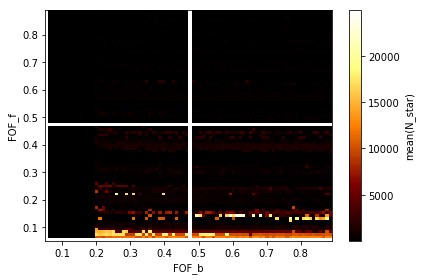

In [112]:
ds_map.plot('FOF_b', 'FOF_f', what='mean(N_star)', shape=86)
p.show()

In [76]:
ds_map.data.FOF_f

array([ 0.05,  0.06,  0.07, ...,  0.88,  0.89,  0.9 ])